# [data](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

df = pd.read_csv(url, sep = "\t")
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## En çok alınan 5 item'dan histogram çiziniz.

In [3]:
df_hist = df.groupby(by = "item_name").sum().sort_values(by = "quantity", ascending = False)[:5]
df_hist.drop("order_id", axis = 1, inplace = True)
df_hist

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


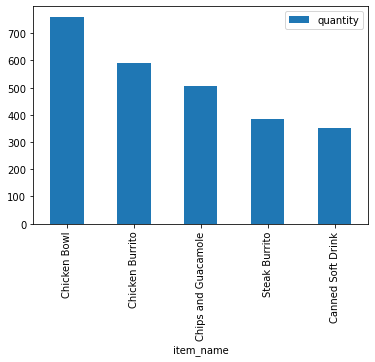

In [4]:
df_hist.plot(kind = "bar");

## Satın alma başına item numaralarını çizdiriniz.

In [5]:
df["item_price"] = [value[1:-1] for value in df["item_price"]]
df[["item_price"]].head()

,item_price
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98


In [6]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [7]:
df["item_price"] = df["item_price"].astype("float")
df.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [8]:
orders = df.groupby("order_id").sum()
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


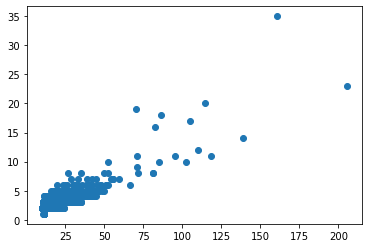

In [9]:
plt.scatter(x = orders["item_price"], y = orders["quantity"]);